<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.983803,59.569123,21.326375,0.416366,145.295668,144.837888,0.457780
1,0.0,1.0,81.854916,45.530040,49.946229,0.432551,187.763736,187.636415,0.127321
2,0.0,2.0,28.068800,86.417842,68.984240,-1.224161,192.246721,193.092500,-0.845779
3,0.0,3.0,92.997974,77.989154,84.055826,1.398704,266.441657,265.248458,1.193199
4,0.0,4.0,25.081975,44.974484,44.218181,-0.361126,123.913513,124.132147,-0.218633
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,49.595436,30.350739,48.912061,1.543873,140.402108,139.354401,1.047708
19996,999.0,16.0,61.105174,62.483395,25.222228,-0.399294,158.411503,159.076309,-0.664806
19997,999.0,17.0,44.193650,50.343925,98.628085,-1.491651,201.674010,202.721061,-1.047051
19998,999.0,18.0,88.571172,40.245329,75.171746,0.728542,214.716788,213.640775,1.076014


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    53.983803  59.569123  21.326375  ...  145.295668  144.837888  0.457780
      1.0    81.854916  45.530040  49.946229  ...  187.763736  187.636415  0.127321
      2.0    28.068800  86.417842  68.984240  ...  192.246721  193.092500 -0.845779
      3.0    92.997974  77.989154  84.055826  ...  266.441657  265.248458  1.193199
      4.0    25.081975  44.974484  44.218181  ...  123.913513  124.132147 -0.218633
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   49.595436  30.350739  48.912061  ...  140.402108  139.354401  1.047708
      16.0   61.105174  62.483395  25.222228  ...  158.411503  159.076309 -0.664806
      17.0   44.193650  50.343925  98.628085  ...  201.674010  202.721061 -1.047051
      18.0   88.571172  40.245329  75.171746  ...  214.716788  213.640775  1.076014
      19.0   65.077635  63.508413  43.738925  ...  182.039789  182.282030 -0.242241

[20000 rows x 7 columns]

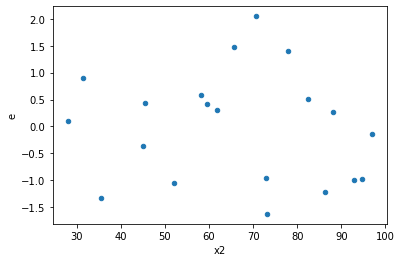

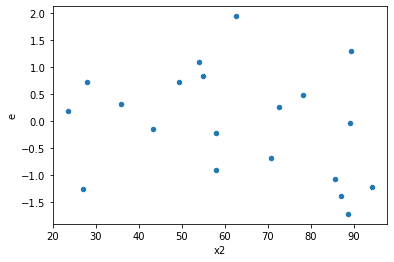

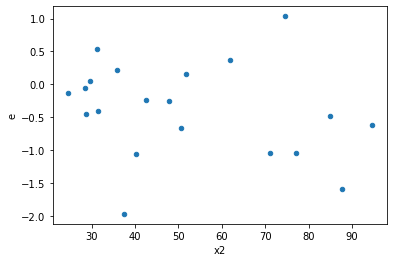

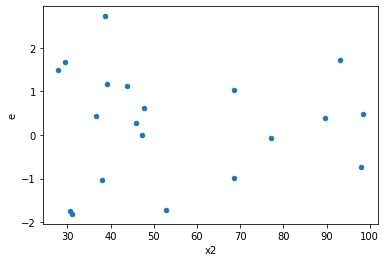

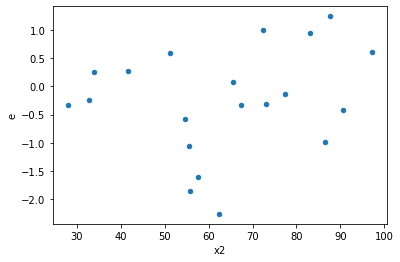

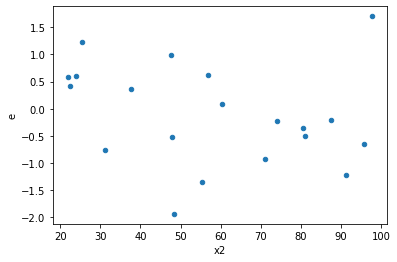

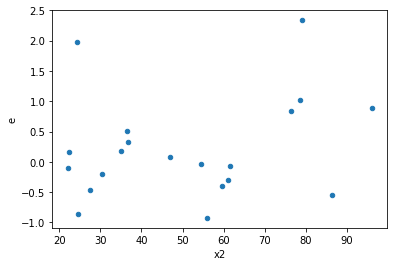

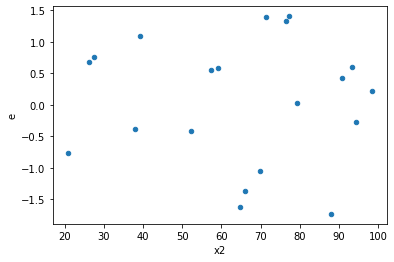

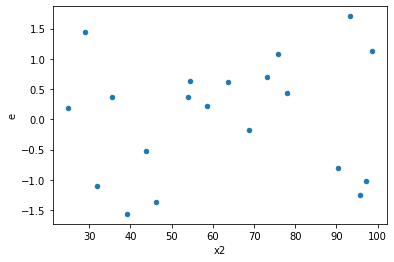

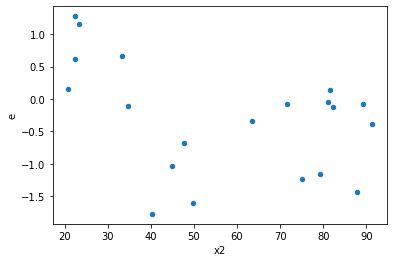

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,3.710535303085196,4.460534890455689,0.7421070606170392,0.8921069780911377,1.2021270587957729,0.8448327879602133,0.5775836060198933,0.42241639398010666,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.2798100182242503,6.144401352862309,0.05596200364485006,1.228880270572462,21.95918999561322,0.004102638978218165,0.9979486805108909,0.0020513194891090825,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,1.769652876007714,2.5950988845426677,0.3539305752015428,0.5190197769085335,1.4664451541463521,0.6846563931011742,0.6576718034494129,0.3423281965505871,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2.2235319268404234,2.947603716538181,0.4447063853680847,0.5895207433076363,1.3256403836425428,0.7646149861001605,0.6176925069499197,0.38230749305008027,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,2.890686239552168,3.358611460564975,0.5781372479104336,0.671722292112995,1.1618734038341354,0.8732418240205237,0.5633790879897381,0.4366209120102619,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,5.340067442754712,6.643290139184779,1.0680134885509425,1.3286580278369557,1.2440461118516866,0.8164655039924438,0.5917672480037781,0.4082327519962219,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,2.3314973817213342,2.36995694698611,0.46629947634426683,0.473991389397222,1.0164956502058695,0.9861130627452899,0.5069434686273551,0.49305653137264494,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,2.0920539972248546,5.7638762840389335,0.41841079944497095,1.1527752568077867,2.755127875133631,0.29027697048260004,0.8548615147587,0.14513848524130002,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,2.6029686774454284,4.720820075848498,0.5205937354890857,0.9441640151696996,1.8136292291006526,0.5293480901890608,0.7353259549054696,0.2646740450945304,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,3.710535303085196,4.460534890455689,0.7421070606170392,0.8921069780911377,1.2021270587957729,0.8448327879602133,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.2798100182242503,6.144401352862309,0.05596200364485006,1.228880270572462,21.95918999561322,0.004102638978218165,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,1.769652876007714,2.5950988845426677,0.3539305752015428,0.5190197769085335,1.4664451541463521,0.6846563931011742,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,6.372842952507167,0.9243048145626395,1.2745685905014335,0.1848609629125279,0.14503806565623978,0.05383291489586849,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,3.338337480116425,1.1105496494420015,0.667667496023285,0.2221099298884003,0.33266548276097924,0.2523417412414079,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2.2235319268404234,2.947603716538181,0.4447063853680847,0.5895207433076363,1.3256403836425428,0.7646149861001605,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,4.456453567117427,2.718305025810864,0.8912907134234853,0.5436610051621729,0.609970458543148,0.6006902765890884,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,2.890686239552168,3.358611460564975,0.5781372479104336,0.671722292112995,1.1618734038341354,0.8732418240205237,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,5.340067442754712,6.643290139184779,1.0680134885509425,1.3286580278369557,1.2440461118516866,0.8164655039924438,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64